[View in Colaboratory](https://colab.research.google.com/github/KenJiangg/Exploring-Datasets/blob/master/GooglePlayEDA.ipynb)

I am working on Google Colab. so I need to add this in order to access the files 

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Libraries I will be using


In [0]:
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

Read Files 

In [0]:
app_review = pd.read_csv('drive/My Drive/Kaggle/Google Play Dataset/googleplaystore.csv')
app_play = pd.read_csv('drive/My Drive/Kaggle/Google Play Dataset/googleplaystore_user_reviews.csv')

Checking the files

In [4]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
app_play.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Comparison between High Rating (4.5+) and # of Reviews

Find all the apps who achieve 4.5 or higher 

In [0]:
high_rating = app_review[app_review['Rating']>4.5]

In [7]:
high_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,"100,000+",Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up


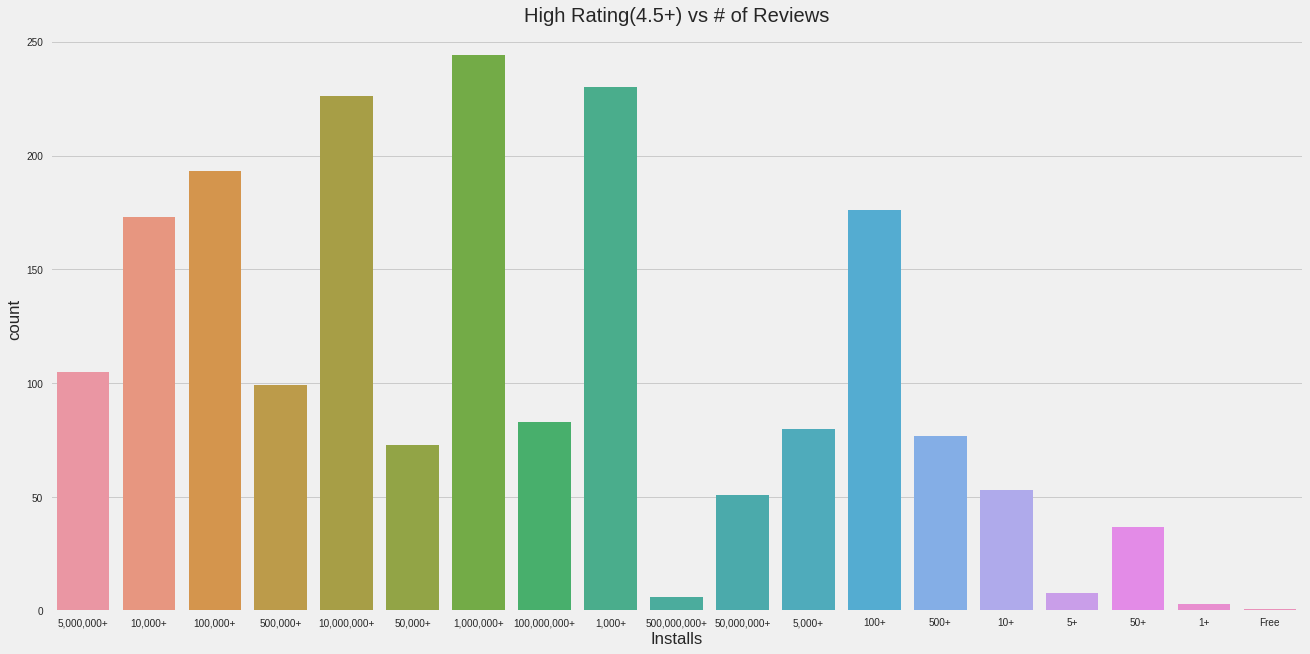

In [8]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('High Rating(4.5+) vs # of Reviews')
ax=sns.countplot(x='Installs',data= high_rating)

We are looking if there is a correlation between the number of installs and high rating therefore we need to order by installs. Lets fix that! 

First lets remove the (+) in order to compare integers and sort by the comparison

In [0]:
high_rating['Installs'] = high_rating['Installs'].astype(str).str[:-1]
high_rating['Installs'] = high_rating['Installs'].str.replace(',', '')
high_rating['Installs']= pd.to_numeric(high_rating['Installs'], errors='coerce').fillna(0).astype(np.int64)
high_rating = high_rating.sort_values('Installs')

In [10]:
high_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7.1M,5,Free,0,Everyone,Medical,"August 3, 2018",1.0.51.0.3,8.0 and up


Lets remove all the 0's so because I set all the 0's for the ones that didn't list the # of installs 

In [0]:
high_rating = high_rating[high_rating['Installs'] != 0]

In [12]:
high_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7.1M,5,Free,0,Everyone,Medical,"August 3, 2018",1.0.51.0.3,8.0 and up
8146,CZ-Help,BOOKS_AND_REFERENCE,5.0,2,1.4M,5,Free,0,Everyone,Books & Reference,"July 13, 2018",0.1,4.4 and up


Let's graph now!

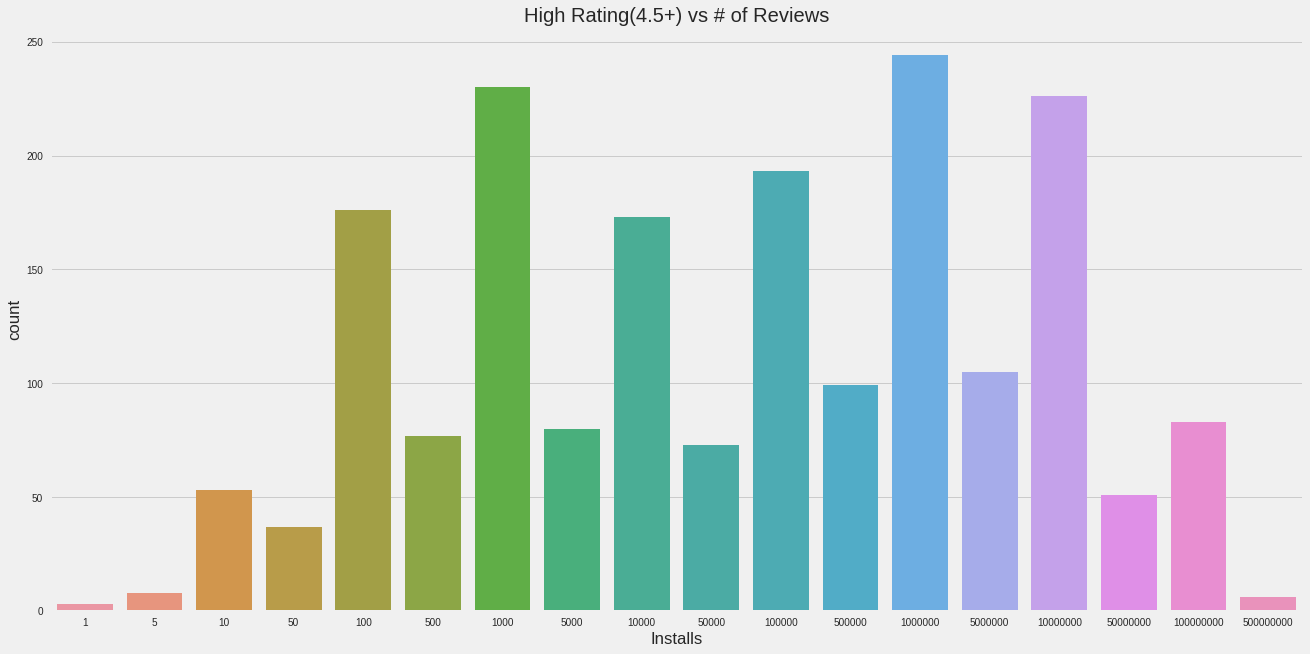

In [13]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('High Rating(4.5+) vs # of Reviews')
ax=sns.countplot(x='Installs',data= high_rating)

Raw numbers don't seem like a good idea here; let's add a proportion for y axis. Let's first make the original data maniputable too and compare the proportions 

In [0]:
app_review['Installs'] = app_review['Installs'].astype(str).str[:-1]
app_review['Installs'] = app_review['Installs'].str.replace(',', '')
app_review['Installs']= pd.to_numeric(app_review['Installs'], errors='coerce').fillna(0).astype(np.int64)
app_review = app_review.sort_values('Installs')

Lets add another column that tells us if the app has 4.5+ rating 

In [0]:
app_review['4.5+'] = app_review['Rating'].map(lambda x: x > 4.5)

In [16]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,4.5+
9719,EP Cook Book,MEDICAL,NaN,0,3.2M,0,Paid,$200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up,False
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up,False
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0,Free,0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up,False
9905,Eu sou Rico,FINANCE,NaN,0,2.6M,0,Paid,$30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up,False
9917,Eu Sou Rico,FINANCE,NaN,0,1.4M,0,Paid,$394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up,False


There's still data that has NaN rating! Let''s delete those 

In [0]:
app_review = app_review[pd.notnull(app_review['Rating'])]

In [18]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,4.5+
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,True
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,True
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,True
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,True
7147,CB Heroes,SOCIAL,5.0,5,1.8M,5,Free,0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up,True


19.0 Rating with 0 Installs? What a great app! 

In [0]:
app_review = app_review[app_review['Category']!= '1.9']

In [20]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,4.5+
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,True
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,True
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,True
7147,CB Heroes,SOCIAL,5.0,5,1.8M,5,Free,0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up,True
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6M,5,Free,0,Everyone,Medical,"August 2, 2018",2.0,4.0 and up,True


Better! Let's group the data by if app has rating higher than 4.5 and use the lambda function in python to get a percentage of what apps meet this threshold 

In [0]:
highFilter = app_review.groupby(['Installs','4.5+']).sum()
highFilter = highFilter.groupby(level=0).apply(lambda x: x / x.sum())
highFilter = highFilter.reset_index()

In [22]:
highFilter

,Installs,4.5+,Rating
0,1,True,1.000000
1,5,False,0.036145
2,5,True,0.963855
3,10,False,0.172987
4,10,True,0.827013
5,50,False,0.258182
6,50,True,0.741818
7,100,False,0.359416
8,100,True,0.640584
9,500,False,0.557832


In [0]:
highFilter = highFilter[::2]

In [24]:
highFilter

,Installs,4.5+,Rating
0,1,True,1.000000
2,5,True,0.963855
4,10,True,0.827013
6,50,True,0.741818
8,100,True,0.640584
10,500,True,0.442168
12,1000,True,0.378052
14,5000,True,0.217704
16,10000,True,0.198549
18,50000,True,0.180454


[Text(0,0.5,'Proportion of 4.5+ to All Ratings'), Text(0.5,0,'# of Installs')]

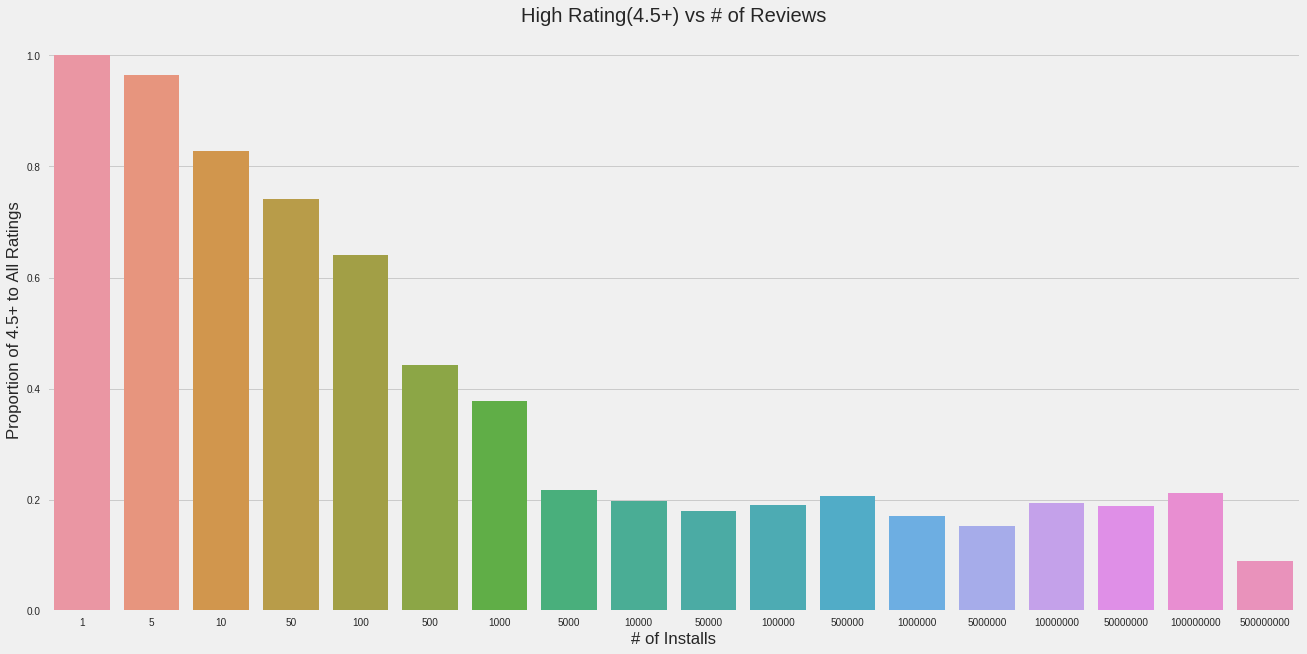

In [25]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('High Rating(4.5+) vs # of Reviews')
ax=sns.barplot(x="Installs", y='Rating', data=highFilter)
ax.set(xlabel='# of Installs', ylabel='Proportion of 4.5+ to All Ratings')

Judging from the graph, I can't draw any conclusive evidence of review inflation as the graph looks normal until it drops to around 50k then the proportions starts flatlining around .2 of overall apps.

Although I find it hard to believe that .2 of apps that get downloaded 50k+,100k+,500k+,1Mil+,5Mil+,10Mil+,50Mil+,100Mil+ have achieved ratings above 4.5, I can think of ways to inflate the reviews such as incentivizing a 5 star rating on the google play store. 

However, there is a massive drop in the proportion of 4.5+ stars as we go from 100 Million Downloads to 500 Million Downloads, this can be attributed to a very small sample size for apps downloaded more than 500 million times. 

# Comparison between Sentiment and High Rating (4.5+)

 For this section we will be exploring whether there is a difference in sentiment between "High Rating" Apps and the rest of the apps. We will be comparing two line graphs to see if high rating constitutes more positive sentiments. To account for difference in # of reviews, we are going to use a proportion of sentiment as our y-axis and we will be using # of downloads as our x-axis.  

**Our Y-AXIS will have two lines running through, one will be proportion of positive sentiment in high rating applications and the other will be the proportion of sentiment in all the applications (The difference should show us how much impact high rating has on the actual sentiments of reviews)**

In [26]:
app_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,4.5+
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,True
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,True
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,True
7147,CB Heroes,SOCIAL,5.0,5,1.8M,5,Free,0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up,True
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6M,5,Free,0,Everyone,Medical,"August 2, 2018",2.0,4.0 and up,True


Let's drop all the reviews that have null sentiment 

In [27]:
reviewFilter = app_play.dropna()
reviewFilter.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


We are looking for a proportion of positive sentiment to the total therefore we want to segment the positive from the total. (We will be combining them for a proper proportion later)

In [0]:
posFilter = reviewFilter[reviewFilter['Sentiment'] == 'Positive']

In [0]:
posCount = posFilter.groupby('App').count()

This is the count of positive sentiment

In [30]:
posCount.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,162,162,162,162
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,31,31,31
11st,23,23,23,23
1800 Contacts - Lens Store,64,64,64,64
1LINE – One Line with One Touch,27,27,27,27


Now we find the total amount of sentiment reviews

In [0]:
totalCount = reviewFilter.groupby('App').count()

In [32]:
totalCount.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,194,194,194,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40,40,40,40
11st,39,39,39,39
1800 Contacts - Lens Store,80,80,80,80
1LINE – One Line with One Touch,38,38,38,38


We only want sentiment count therefore lets set two dataframes having only the sentiment count

In [0]:
posSenti = posCount['Sentiment']
totSenti = totalCount['Sentiment']

Now we want the proportion therefore we should divide the two dataframes

In [0]:
posProp = posSenti.div(totSenti.iloc[0])

New dataframe with the proportions

In [0]:
posPD = pd.DataFrame(posProp)

create a separate dataset with app_redview's app name and # of installations

In [0]:
popAnd = app_review[['App','Installs']]

index has the name of the apps but we want to compare apps therefore we need to create a new column that grabs the app name

In [0]:
posPD['App'] = posPD.index.tolist()

In [38]:
posPD.head()

,Sentiment,App
App,,
10 Best Foods for You,0.835052,10 Best Foods for You
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.159794,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室
11st,0.118557,11st
1800 Contacts - Lens Store,0.329897,1800 Contacts - Lens Store
1LINE – One Line with One Touch,0.139175,1LINE – One Line with One Touch


In [39]:
popAnd.head()

,App,Installs
5917,Ra Ga Ba,1
10697,Mu.F.O.,1
2454,KBA-EZ Health Guide,1
7147,CB Heroes,5
2459,Anatomy & Physiology Vocabulary Exam Review App,5


merge the separate dataset(popAnd) and the proportions used

In [0]:
merged = pd.merge(popAnd, posPD, how = 'left', left_on = 'App', right_on = 'App')

Now we drop all null values in our merged dataframe

In [0]:
merFilter = merged.dropna()


We want to find the sum of the apps by the number of installs. We should end up with only # of installations and # of positive sentiments; (no specific app names)

In [0]:
toSentiment = merFilter.groupby(['Installs']).sum()
toSentiment['Installs'] = toSentiment.index.tolist()

allows us to get the count of app names in each installation subgroup

In [0]:
countSenti = merFilter.groupby(['Installs'], sort=False).size().reset_index(name='Count')


divide all the sums by all the counts to get a proportion instead of a finite number

In [0]:
sentGra = toSentiment.set_index('Installs')['Sentiment']/countSenti.set_index('Installs')['Count']


make into a dataframe and use index to get installation subgroups

In [0]:
sentiFinal = pd.DataFrame(sentGra)
sentiFinal['Installs'] = sentiFinal.index.tolist()

Graph!

[Text(0,0.5,'An average of proportions of Sentiment'),
 Text(0.5,0,'# of Installs')]

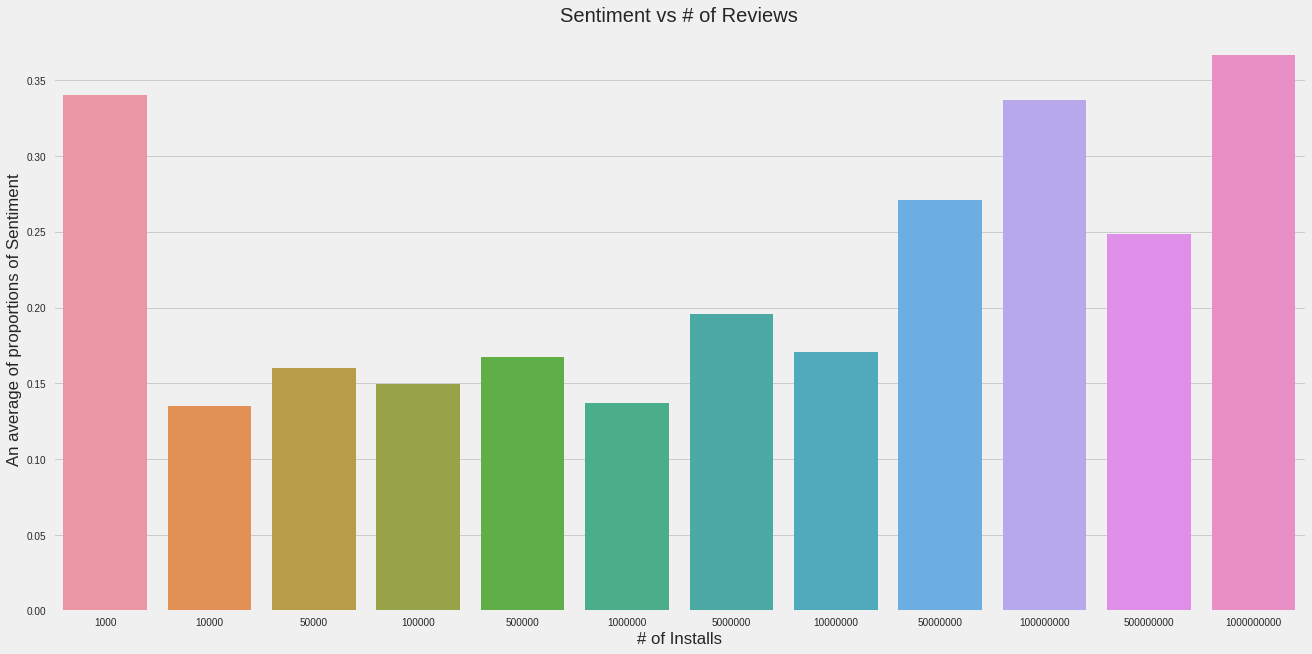

In [46]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('Sentiment vs # of Reviews')
ax = sns.barplot(x="Installs", y=0, data=sentiFinal)
ax.set(xlabel='# of Installs', ylabel='An average of proportions of Sentiment')

Graph doesn't look to good yet but let's create the segmented graph of 4.5 + first. 

Now we repeat the entire process but with the segmented dataset; only apps with a 4.5 rating or higher are in this dataset. 

In [0]:
segMent = app_review[app_review['4.5+'] == True]
highPop = segMent[['App','Installs']]
highMerged = pd.merge(highPop, posPD, how = 'left', left_on = 'App', right_on = 'App')
highFilter = highMerged.dropna()
highSum = highFilter.groupby(['Installs']).sum()
highSum['Installs'] = highSum.index.tolist()
highCount = highFilter.groupby(['Installs'], sort=False).size().reset_index(name='Count')
highProps = highSum.set_index('Installs')['Sentiment']/highCount.set_index('Installs')['Count']
highProps = pd.DataFrame(highProps)
highProps['Installs'] = highProps.index.tolist()



Graph the segmented dataset

[Text(0,0.5,'An average of proportions of Sentiment'),
 Text(0.5,0,'# of Installs')]

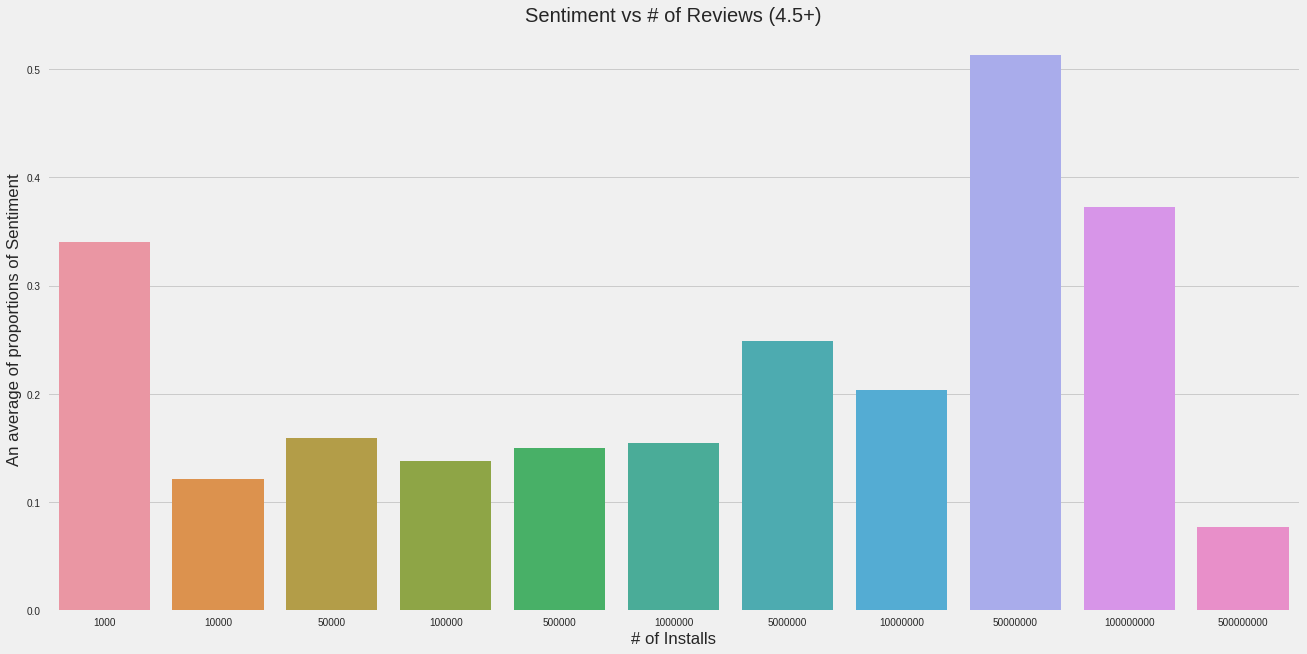

In [48]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('Sentiment vs # of Reviews (4.5+)')
ax = sns.barplot(x="Installs", y=0, data=highProps)
ax.set(xlabel='# of Installs', ylabel='An average of proportions of Sentiment')

Doesn't look too good either, lets merge the two datasets and get a side by side comparison

In [0]:
sentiMerge = pd.merge(highProps, sentiFinal, how = 'left', left_on = 'Installs', right_on = 'Installs')

rename the column names into something readable

In [0]:
sentiMerge=sentiMerge.rename(columns = {'0_x':'highSenti'})
sentiMerge=sentiMerge.rename(columns = {'0_y':'normSenti'})

In [51]:
sentiMerge

,highSenti,Installs,normSenti
0,0.340206,1000,0.340206
1,0.121993,10000,0.135052
2,0.159794,50000,0.160438
3,0.138439,100000,0.149623
4,0.150451,500000,0.167649
5,0.154897,1000000,0.137297
6,0.248527,5000000,0.196043
7,0.203895,10000000,0.170583
8,0.512577,50000000,0.271163
9,0.372730,100000000,0.336935


changes dataframe from wide format to long format (we have mutliple identifier variables in a single row and want to use these identifier variables therefore we change it into long format where we can compare the two different types; in this case highSenti and normSenti.)

In [0]:
sentiComp = pd.melt(sentiMerge, id_vars=['Installs']).sort_values(['variable','value'])

Graph!

[Text(0,0.5,'An average of proportions of Sentiment'),
 Text(0.5,0,'# of Installs')]

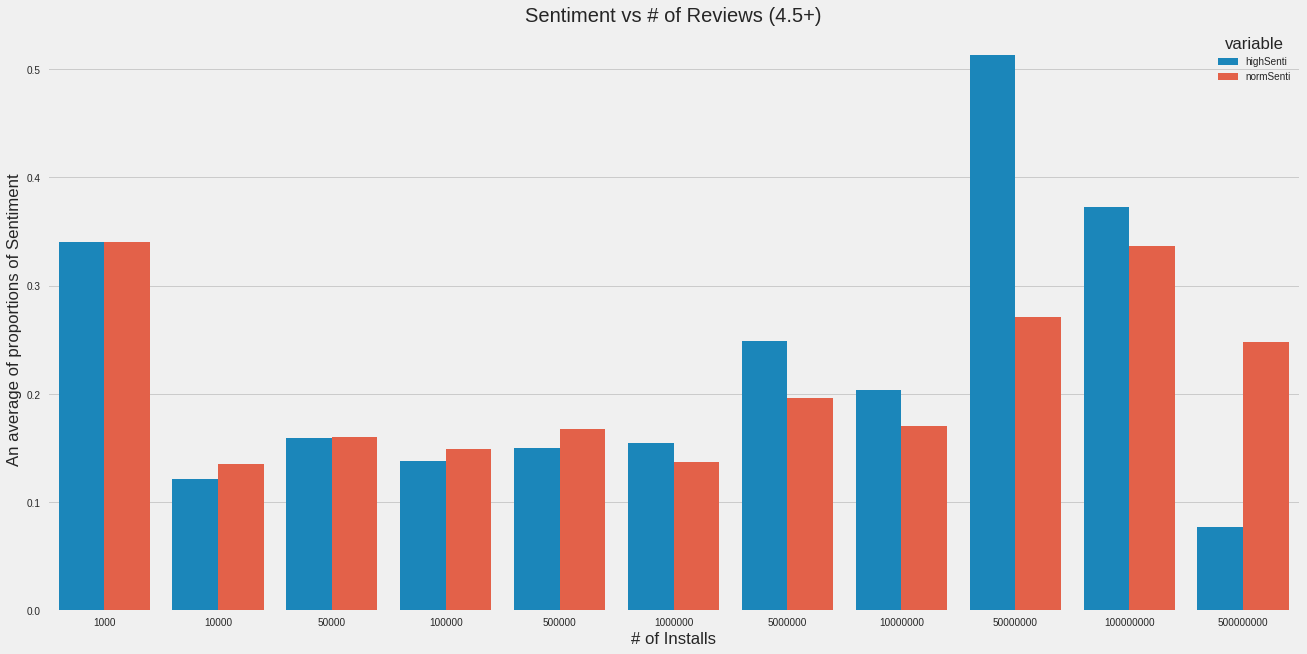

In [53]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('Sentiment vs # of Reviews (4.5+)')
ax = sns.barplot(x='Installs', y='value', hue='variable', data=sentiComp)
ax.set(xlabel='# of Installs', ylabel='An average of proportions of Sentiment')

Positive sentiment in this case is given by the dataset itself( I don't control what reviews have a positive/neutral/negative sentiment), I am assuming this information is correct in order to make my statements. I am also assuming positive sentiments are only given when text is typed because I want to find out which installation ranges incentivize rating the apps more.  

Judging from this comparison, there isn't of a difference in the proportions until you get to around the 5-10 million installation part.  There is a significant (almost double) the amount of positive sentiment proportion for the high rating(4.5+) vs every app in the 5-10 million range. It seems there is a weak positive correlation between the proportion of positive sentiment and # of downloads. Another reason for this extremely high (more than 50% of views give positive sentiment) ratio could be that these apps in the installation range captures a specific niche of users and performs very well for that niche therefore the reviews will be very positive. 

While the 50 million also has a significant difference, this coud be attributed to proportion size as the N for highSenti is 2. However, it still doesn't look too good because although it has more than 50 million downloads the proportion of positive sentiment for the app is less than 10% while the the rating for the app is 5 stars. This could mean that the app has a way of incentivizing 5 star reviews while not requiring the user to input any words/give sentiment.

# TBD - still thinking of another way to explore this dataset